<a href="https://colab.research.google.com/github/titusss/Fast-Image-Generation-with-Wurstchen/blob/main/Fast_Image_Generation_with_Wuerstchen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Very fast image generation with Würstchen 🌭

Make sure you have a GPU selected via Runtime > Change runtime type > Hardware accelerator. An A100 GPU will allow for 2 sec. generations.

In [ ]:
!pip install -U diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.9 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.0-py3-none-any.whl size=1486308 sha256=e2017f296e28f6b96e8f0af3ef82ca6a999172c931d00f02a63666f54a08445d
  Stored in directory: /root/.cache/pip/wheels/59/90/fd/c35ca194b21484053d9742ee7599042257b033bb48e8a4727b
Successfully built diffusers


In [ ]:
import torch
from diffusers import AutoPipelineForText2Image
from diffusers.pipelines.wuerstchen import DEFAULT_STAGE_C_TIMESTEPS

pipeline = AutoPipelineForText2Image.from_pretrained("warp-ai/wuerstchen", torch_dtype=torch.float16).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (129 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tra 4 0 0 camera f 1. 6 lens, rich colors, hyper realistic, lifelike texture, dramatic, lighting, cinestill 8 0 0 tungsten, facial clarity, black lace, half classicism half surrealism aristocratic lady, mystery style tattoo']


  0%|          | 0/29 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (129 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tra 4 0 0 camera f 1. 6 lens, rich colors, hyper realistic, lifelike texture, dramatic, lighting, cinestill 8 0 0 tungsten, facial clarity, black lace, half classicism half surrealism aristocratic lady, mystery style tattoo']


  0%|          | 0/12 [00:00<?, ?it/s]

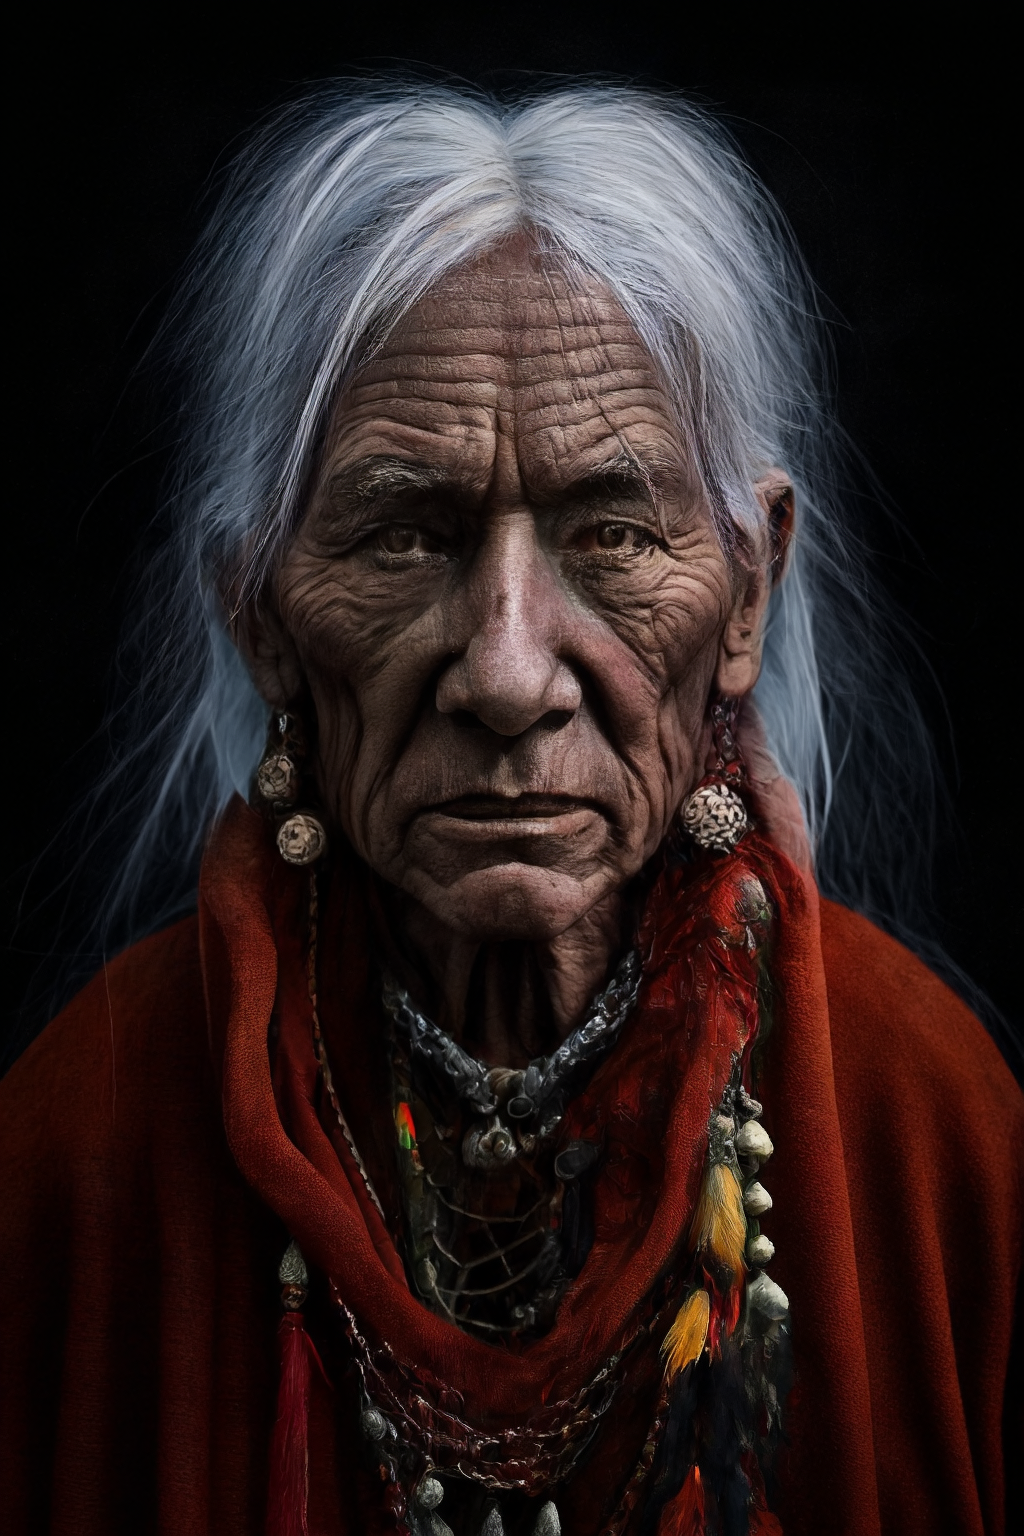

In [ ]:
prompt = "masterpiece, best quality, portrait of an old shaman, solo, natural skin texture, realistic eye and face details, dark, deep shadow, darkness, moonlight, award winning photo, extremely detailed, fine detail, highly detailed, extremely detailed eyes and face, piercing red eyes, detailed clothes, skinny, gothic, native american clothing, analog film, stock photograph, kodak, portra 400 camera f1.6 lens, rich colors, hyper realistic, lifelike texture, dramatic, lighting, cinestill 800 tungsten, facial clarity, black lace, half classicism half surrealism aristocratic lady, mystery style tattoo"

images = pipeline(
    prompt,
    height=1024,
    width=1536,
    prior_timesteps=DEFAULT_STAGE_C_TIMESTEPS,
    prior_guidance_scale=4.0,
    num_images_per_prompt=1,
).images
images[0]